In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
random.seed(42)
import datetime

# Представление данных в виде графа

In [3]:
G = nx.Graph()
rooms1 = ['Entry', 'Hall',  'Corridor1', 'Corridor2', 'Corridor3', 'Corridor4', 'Corridor5']
rooms2 = range(1,22)
for i in rooms1:
  G.add_node(i)
for i in rooms2:
  G.add_node(f'cabinet {i}')
print(G.adj)

{'Entry': {}, 'Hall': {}, 'Corridor1': {}, 'Corridor2': {}, 'Corridor3': {}, 'Corridor4': {}, 'Corridor5': {}, 'cabinet 1': {}, 'cabinet 2': {}, 'cabinet 3': {}, 'cabinet 4': {}, 'cabinet 5': {}, 'cabinet 6': {}, 'cabinet 7': {}, 'cabinet 8': {}, 'cabinet 9': {}, 'cabinet 10': {}, 'cabinet 11': {}, 'cabinet 12': {}, 'cabinet 13': {}, 'cabinet 14': {}, 'cabinet 15': {}, 'cabinet 16': {}, 'cabinet 17': {}, 'cabinet 18': {}, 'cabinet 19': {}, 'cabinet 20': {}, 'cabinet 21': {}}


In [4]:
G.add_edge('Entry', 'Hall')
G.add_edge('Hall', 'Corridor1')
G.add_edge('Hall', 'Corridor2')
G.add_edge('Hall', 'Corridor3')
G.add_edge('Corridor1', 'Corridor4')
G.add_edge('Corridor2', 'Corridor5')
for i in [1,2,3,4]:
  G.add_edge(f'cabinet {i}', 'Corridor1')
for i in [5,6,7,8]:
  G.add_edge(f'cabinet {i}', 'Corridor2')
for i in [9,10,11,12,13]:
  G.add_edge(f'cabinet {i}', 'Corridor3')
for i in [14,15,16,17]:
  G.add_edge(f'cabinet {i}', 'Corridor4')
for i in [18,19,20,21]:
  G.add_edge(f'cabinet {i}', 'Corridor5')


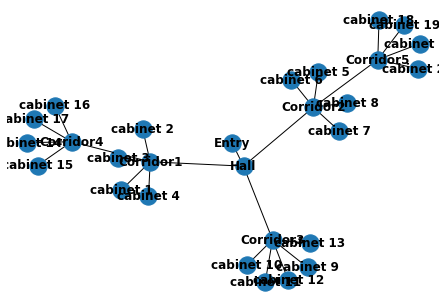

In [5]:
#scheme of office
nx.draw(G, with_labels=True, font_weight='bold')

# Моделирование данных 

Задание плана здания, количества сотрудников и параметров времени

In [6]:
rooms = np.array(G.nodes())
rooms

array(['Entry', 'Hall', 'Corridor1', 'Corridor2', 'Corridor3',
       'Corridor4', 'Corridor5', 'cabinet 1', 'cabinet 2', 'cabinet 3',
       'cabinet 4', 'cabinet 5', 'cabinet 6', 'cabinet 7', 'cabinet 8',
       'cabinet 9', 'cabinet 10', 'cabinet 11', 'cabinet 12',
       'cabinet 13', 'cabinet 14', 'cabinet 15', 'cabinet 16',
       'cabinet 17', 'cabinet 18', 'cabinet 19', 'cabinet 20',
       'cabinet 21'], dtype='<U10')

In [7]:
n_workers = [*range(10)]

In [8]:
# Iterate over time:
d0 = datetime.datetime(2021,3,8, 10,0,0)
d1 = datetime.datetime(2021,3,8, 17,30,0)
sec_step = 10
dt = datetime.timedelta(seconds = sec_step)
day = np.arange(d0,d1,dt).astype(datetime.datetime)

Вспомогательные функции и словари с вероятностями перехода из одного помещения в другое

In [9]:
def write_to_table_new(a,b,c,d, table : pd.DataFrame):
  e = datetime.timedelta(seconds=(d-c).total_seconds())
  line = pd.DataFrame(np.array([a,b,c,d,e]).reshape(1,5))
  table = table.append(line)
  return table

In [10]:
conections_inclass = {
    'Corridor1': [['cabinet 1', 'cabinet 2', 'cabinet 3', 'cabinet 4', 'Corridor1', 'Hall', 'Corridor4'], [10,5,7,17,25,15,15]],
    'Corridor2': [['cabinet 5', 'cabinet 6', 'cabinet 7', 'cabinet 8', 'Corridor2', 'Hall', 'Corridor5'], [18,22,24,12,5,15,15]],
    'Corridor3': [['cabinet 9', 'cabinet 10', 'cabinet 11', 'cabinet 12','cabinet 13', 'Corridor3', 'Hall'], [25,15,12,17,27,5,15]],
    'Corridor4': [['cabinet 14', 'cabinet 15', 'cabinet 16', 'cabinet 17', 'Corridor1', 'Corridor4'], [25,9,14,30,15,5]],
    'Corridor5': [['cabinet 18', 'cabinet 19', 'cabinet 20', 'cabinet 21', 'Corridor2', 'Corridor5'], [20,28,14,38,15,5]],
    'Entry': [['Entry','Hall'], [30, 70]],
    'Hall': [['Entry', 'Hall', 'Corridor1', 'Corridor2', 'Corridor3'], [5,10,25,25,25]],
    'cabinet 1': [['cabinet 1', 'Corridor1'], [1000,2]],
    'cabinet 10': [['cabinet 10', 'Corridor3'], [1000,2]],
    'cabinet 11': [['cabinet 11', 'Corridor3'], [1000,2]],
    'cabinet 12': [['cabinet 12', 'Corridor3'], [1000,2]],
    'cabinet 13': [['cabinet 13', 'Corridor3'], [1000,2]],
    'cabinet 14': [['cabinet 14', 'Corridor4'], [1000,2]],
    'cabinet 15': [['cabinet 15', 'Corridor4'], [1000,2]],
    'cabinet 16': [['cabinet 16', 'Corridor4'], [1000,2]],
    'cabinet 17': [['cabinet 17', 'Corridor4'], [1000,2]],
    'cabinet 18': [['cabinet 18', 'Corridor5'], [1000,2]],
    'cabinet 19': [['cabinet 19', 'Corridor5'], [1000,2]],
    'cabinet 2': [['cabinet 2', 'Corridor1'], [1000,2]],
    'cabinet 20': [['cabinet 20', 'Corridor5'], [1000,2]],
    'cabinet 21': [['cabinet 21', 'Corridor5'], [1000,2]],
    'cabinet 3': [['cabinet 3', 'Corridor1'], [1000,2]],
    'cabinet 4': [['cabinet 4', 'Corridor1'], [1000,2]],
    'cabinet 5': [['cabinet 5', 'Corridor2'], [1000,2]],
    'cabinet 6': [['cabinet 6', 'Corridor2'], [1000,2]],
    'cabinet 7': [['cabinet 7', 'Corridor2'], [1000,2]],
    'cabinet 8': [['cabinet 8', 'Corridor2'], [1000,2]],
    'cabinet 9': [['cabinet 9', 'Corridor3'], [1000,2]]
    }

In [11]:
conections_break = {
    'Corridor1': [['cabinet 1', 'cabinet 2', 'cabinet 3', 'cabinet 4', 'Corridor1', 'Hall', 'Corridor4'], [10,5,7,17,25,15,15]],
    'Corridor2': [['cabinet 5', 'cabinet 6', 'cabinet 7', 'cabinet 8', 'Corridor2', 'Hall', 'Corridor5'], [18,22,24,12,5,15,15]],
    'Corridor3': [['cabinet 9', 'cabinet 10', 'cabinet 11', 'cabinet 12','cabinet 13', 'Corridor3', 'Hall'], [25,15,12,17,27,5,15]],
    'Corridor4': [['cabinet 14', 'cabinet 15', 'cabinet 16', 'cabinet 17', 'Corridor1', 'Corridor4'], [25,9,14,30,15,5]],
    'Corridor5': [['cabinet 18', 'cabinet 19', 'cabinet 20', 'cabinet 21', 'Corridor2', 'Corridor5'], [20,28,14,38,15,5]],
    'Entry': [['Entry', 'Hall'], [30, 70]],
    'Hall': [['Entry', 'Hall' , 'Corridor1', 'Corridor2', 'Corridor3'], [5,10,25,25,25]],
    'cabinet 1': [['cabinet 1', 'Corridor1'], [50,50]],
    'cabinet 10': [['cabinet 10', 'Corridor3'], [50,50]],
    'cabinet 11': [['cabinet 11', 'Corridor3'], [50,50]],
    'cabinet 12': [['cabinet 12', 'Corridor3'], [50,50]],
    'cabinet 13': [['cabinet 13', 'Corridor3'], [50,50]],
    'cabinet 14': [['cabinet 14', 'Corridor4'], [50,50]],
    'cabinet 15': [['cabinet 15', 'Corridor4'], [50,50]],
    'cabinet 16': [['cabinet 16', 'Corridor4'], [50,50]],
    'cabinet 17': [['cabinet 17', 'Corridor4'], [50,50]],
    'cabinet 18': [['cabinet 18', 'Corridor5'], [50,50]],
    'cabinet 19': [['cabinet 19', 'Corridor5'], [50,50]],
    'cabinet 2': [['cabinet 2', 'Corridor1'], [50,50]],
    'cabinet 20': [['cabinet 20', 'Corridor5'], [50,50]],
    'cabinet 21': [['cabinet 21', 'Corridor5'], [50,50]],
    'cabinet 3': [['cabinet 3', 'Corridor1'], [50,50]],
    'cabinet 4': [['cabinet 4', 'Corridor1'], [50,50]],
    'cabinet 5': [['cabinet 5', 'Corridor2'], [50,50]],
    'cabinet 6': [['cabinet 6', 'Corridor2'], [50,50]],
    'cabinet 7': [['cabinet 7', 'Corridor2'], [50,50]],
    'cabinet 8': [['cabinet 8', 'Corridor2'], [50,50]],
    'cabinet 9': [['cabinet 9', 'Corridor3'], [50,50]]
    }

## Моделирование одного дня 

In [ ]:
day_in_office = pd.DataFrame([])
for employee in n_workers:
  for time in day:
    if datetime.datetime(2021,3,8, 10,0,0) == time:
      #office_day_1 = write_to_table('Entry',f'employee{employee}', time, Nan, office_day_2)
      place_in_time = 'Entry'
      temp_time = time
      continue
    
    if  (datetime.datetime(2021,3,8, 10,0,0) < time < datetime.datetime(2021,3,8, 11,30,0) or datetime.datetime(2021,3,8, 11,45,0)
     < time < datetime.datetime(2021,3,8, 13,15,0) or datetime.datetime(2021,3,8, 14,15,0) < time < datetime.datetime(2021,3,8, 15,45,0) 
     or datetime.datetime(2021,3,8, 16,0,0) < time < datetime.datetime(2021,3,8, 17,30,0)) :

      for i in conections_inclass:  
        if place_in_time == i:
          place_in_time_new = random.choices(conections_inclass[i][0], weights=conections_inclass[i][1], k=1)[0]
          if place_in_time_new == place_in_time:
            break
          else : 
            day_in_office = write_to_table_new(place_in_time,f'employee{employee}', temp_time, time, day_in_office)
            temp_time = time
            place_in_time = place_in_time_new
            break

    else:
      for i in conections_break:  
        if place_in_time == i:
          place_in_time_new = random.choices(conections_break[i][0], weights=conections_break[i][1], k=1)[0]
          if place_in_time_new == place_in_time:
            break
          else : 
            day_in_office = write_to_table_new(place_in_time,f'employee{employee}', temp_time, time, day_in_office)
            temp_time = time
            place_in_time = place_in_time_new
            break


day_in_office.columns = ['Place', 'Employee', 'Enter_Time', 'Exit_time', 'Difference']

In [ ]:
day_in_office

,Place,Employee,Enter_Time,Exit_time,Difference
0,Entry,employee0,2021-03-08 10:00:00,2021-03-08 10:00:10,0 days 00:00:10
0,Hall,employee0,2021-03-08 10:00:10,2021-03-08 10:00:20,0 days 00:00:10
0,Entry,employee0,2021-03-08 10:00:20,2021-03-08 10:00:50,0 days 00:00:30
0,Hall,employee0,2021-03-08 10:00:50,2021-03-08 10:01:00,0 days 00:00:10
0,Corridor2,employee0,2021-03-08 10:01:00,2021-03-08 10:01:10,0 days 00:00:10
...,...,...,...,...,...
0,Corridor4,employee9,2021-03-08 15:58:20,2021-03-08 15:58:30,0 days 00:00:10
0,cabinet 14,employee9,2021-03-08 15:58:30,2021-03-08 15:59:10,0 days 00:00:40
0,Corridor4,employee9,2021-03-08 15:59:10,2021-03-08 15:59:20,0 days 00:00:10
0,cabinet 15,employee9,2021-03-08 15:59:20,2021-03-08 15:59:30,0 days 00:00:10


In [ ]:
day_in_office.to_excel('df_new_employees.xlsx')

## Моделирование на заданное количество дней

In [12]:
# Надо задать начальное время первого дня, количество сотрудников, и количество дней
# conections_break, conections_inclass, write_to_table_new - не трогать, просто встваить то же самое (см. как вызывается функция в следующей ячейке)
# Возвращает список из датафреймов, каждый из которых - один рабочий день
def model_some_data(conections_break, conections_inclass, write_to_table_new, start_time = datetime.datetime(2021,3,15, 10,0,0), n_workers = 100, n_days=10):
  all_data = []  
  for j in range(n_days):
    day_in_office = pd.DataFrame([])

    d0 = start_time + datetime.timedelta(days=j)
    d1 = start_time + datetime.timedelta(days=j, hours = 7, minutes = 30)
    sec_step = 10
    dt = datetime.timedelta(seconds = sec_step)
    day = np.arange(d0,d1,dt).astype(datetime.datetime)
# Правка
    n_workers=random.randint(80, 120)
# Правка
    for employee in range(n_workers):
      for time in day:

        if d0 == time:
        #office_day_1 = write_to_table('Entry',f'employee{employee}', time, Nan, office_day_2)
          place_in_time = 'Entry'
          temp_time = time
          continue
# Правка        
        if random.randint(1, 3) == 1:
            continue
# Правка            
            
        if  (d0 < time < d0+datetime.timedelta(days=0, hours = 1, minutes = 30) or d0+datetime.timedelta(days=0, hours = 1, minutes = 45)
         < time < d0+datetime.timedelta(days=0, hours = 3, minutes = 15) or d0+datetime.timedelta(days=0, hours = 4, minutes = 15) < time < d0+datetime.timedelta(days=0, hours = 5, minutes = 45) 
         or d0+datetime.timedelta(days=0, hours = 6, minutes = 0)  < time < d0+datetime.timedelta(days=0, hours = 7, minutes = 30) ) :

          for i in conections_inclass:  
            if place_in_time == i:
              place_in_time_new = random.choices(conections_inclass[i][0], weights=conections_inclass[i][1], k=1)[0]
              if place_in_time_new == place_in_time:
                break
              else : 
                day_in_office = write_to_table_new(place_in_time,f'employee{employee}', temp_time, time, day_in_office)
                temp_time = time
                place_in_time = place_in_time_new
                break

        else:
          for i in conections_break:  
            if place_in_time == i:
              place_in_time_new = random.choices(conections_break[i][0], weights=conections_break[i][1], k=1)[0]
              if place_in_time_new == place_in_time:
                break
              else : 
                day_in_office = write_to_table_new(place_in_time,f'employee{employee}', temp_time, time, day_in_office)
                temp_time = time
                place_in_time = place_in_time_new
                break
    day_in_office.columns = ['Place', 'Employee', 'Enter_Time', 'Exit_time', 'Difference']
    all_data.append(day_in_office)
    
  return all_data

In [13]:
%%time
my_data = model_some_data(conections_break, conections_inclass, write_to_table_new, start_time = datetime.datetime(2021,3,15, 10,0,0))

CPU times: user 8min 37s, sys: 3.08 s, total: 8min 41s
Wall time: 8min 39s


In [14]:
my_data

[         Place     Employee  ...           Exit_time      Difference
 0        Entry    employee0  ... 2021-03-15 10:01:10 0 days 00:01:10
 0         Hall    employee0  ... 2021-03-15 10:01:30 0 days 00:00:20
 0    Corridor1    employee0  ... 2021-03-15 10:02:30 0 days 00:01:00
 0    cabinet 3    employee0  ... 2021-03-15 10:26:00 0 days 00:23:30
 0    Corridor1    employee0  ... 2021-03-15 10:27:10 0 days 00:01:10
 ..         ...          ...  ...                 ...             ...
 0   cabinet 21  employee119  ... 2021-03-15 16:46:00 0 days 00:40:40
 0    Corridor5  employee119  ... 2021-03-15 16:46:20 0 days 00:00:20
 0   cabinet 21  employee119  ... 2021-03-15 17:17:50 0 days 00:31:30
 0    Corridor5  employee119  ... 2021-03-15 17:18:20 0 days 00:00:30
 0    Corridor2  employee119  ... 2021-03-15 17:18:30 0 days 00:00:10
 
 [30745 rows x 5 columns],
         Place     Employee  ...           Exit_time      Difference
 0       Entry    employee0  ... 2021-03-16 10:00:10 0 days 00

In [15]:
dff=my_data[0]
for i in my_data[1:]:
    dff=dff.append(i, sort=False)
dff

,Place,Employee,Enter_Time,Exit_time,Difference
0,Entry,employee0,2021-03-15 10:00:00,2021-03-15 10:01:10,0 days 00:01:10
0,Hall,employee0,2021-03-15 10:01:10,2021-03-15 10:01:30,0 days 00:00:20
0,Corridor1,employee0,2021-03-15 10:01:30,2021-03-15 10:02:30,0 days 00:01:00
0,cabinet 3,employee0,2021-03-15 10:02:30,2021-03-15 10:26:00,0 days 00:23:30
0,Corridor1,employee0,2021-03-15 10:26:00,2021-03-15 10:27:10,0 days 00:01:10
...,...,...,...,...,...
0,cabinet 1,employee113,2021-03-24 15:59:40,2021-03-24 15:59:50,0 days 00:00:10
0,Corridor1,employee113,2021-03-24 15:59:50,2021-03-24 16:00:10,0 days 00:00:20
0,Corridor4,employee113,2021-03-24 16:00:10,2021-03-24 16:00:30,0 days 00:00:20
0,cabinet 15,employee113,2021-03-24 16:00:30,2021-03-24 17:10:20,0 days 01:09:50


In [16]:
dff.to_excel('df_no_cafe.xlsx')

In [ ]:
dff['hour'] = dff.Enter_Time.dt.hour
dff['day'] = dff.Enter_Time.dt.day
dff['month'] = dff.Enter_Time.dt.month
max_count = dff.groupby(['month', 'day', 'hour', 'Place'])[['Employee']].nunique().reset_index().groupby("Place")[['Employee']].max().reset_index()
max_count.rename(columns={"Employee":"max_count"}, inplace=True)

In [ ]:
max_count.merge(dff, left_on="Place", right_on="Place").iloc[:,:-4].to_excel('data_10_days1.xlsx')

In [ ]:
max_count

,Place,max_count
0,Cafe,88
1,Corridor1,103
2,Corridor2,108
3,Corridor3,102
4,Corridor4,87
5,Corridor5,96
6,Entry,119
7,Hall,119
8,cabinet 1,70
9,cabinet 10,77
